# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
# To help with reading and manipulation of data
import numpy as np
import pandas as pd

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score,GridSearchCV,RandomizedSearchCV

# To impute missing values
from sklearn.impute import SimpleImputer


from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression



# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
churn_data = pd.read_csv("/content/sample_data/BankChurners.csv")


In [ ]:
df = churn_data.copy()

## Data Overview

- Observations
- Sanity checks

###View the shape of the dataset

In [ ]:
churn_data.shape

(10127, 21)

- There are 10127 rows and 21 columns

###View first 5 and last 5 rows of the dataset

In [ ]:
churn_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
churn_data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


###View random samples of the data

In [ ]:
churn_data.sample(n=15)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5691,721044333,Existing Customer,34,F,2,College,Single,Less than $40K,Blue,22,...,2,0,1695.0,761,934.0,0.797,4905,91,0.750,0.449
2367,713366583,Existing Customer,63,F,1,High School,Married,Less than $40K,Blue,56,...,1,3,3055.0,1685,1370.0,0.541,1405,40,0.481,0.552
2285,772637058,Existing Customer,34,M,3,Uneducated,Married,$60K - $80K,Blue,24,...,1,4,8167.0,1740,6427.0,1.455,2141,51,0.700,0.213
6796,714196008,Existing Customer,43,M,2,Graduate,NaN,$60K - $80K,Blue,25,...,3,1,7534.0,0,7534.0,0.587,4685,79,0.975,0.000
5946,778669608,Existing Customer,49,F,4,NaN,Married,$40K - $60K,Blue,29,...,3,2,1564.0,0,1564.0,1.114,5172,78,0.733,0.000
3498,817965858,Existing Customer,42,F,4,NaN,Married,Less than $40K,Blue,37,...,1,3,2757.0,1785,972.0,0.735,3766,69,0.605,0.647
4545,789705408,Existing Customer,50,M,2,College,Married,$60K - $80K,Blue,37,...,1,2,4743.0,1687,3056.0,0.957,3739,55,0.618,0.356
506,720267033,Existing Customer,34,M,4,Post-Graduate,Single,$80K - $120K,Blue,26,...,3,2,5100.0,1786,3314.0,1.060,2375,63,0.575,0.350
446,711791583,Attrited Customer,52,F,1,Graduate,Single,Less than $40K,Blue,40,...,2,2,2317.0,0,2317.0,1.005,884,19,0.727,0.000
4508,788544108,Existing Customer,43,F,2,High School,Single,Less than $40K,Blue,37,...,3,0,6611.0,1041,5570.0,0.744,4037,74,0.682,0.157


* Checked the data ramdomly to see any missing or unknown values in the data
* There are null values in Education_Level and Marital_Status
* There are string values in Income_Category

###Checking data types of the columns in the dataset

In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There are few columns with Object data type, we can convert its as categorical data type
- Education_Level and Marital_Status have null values

###Checking statistical summary

In [ ]:
churn_data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


- Min age starts fro 46 years and max goes up to 73 years
- Credit limit,Avg_Open_To_Buy looks like having outliers, we can do further analysis in EDA

###Checking for duplicated records, missing data and no of unique values

In [ ]:
#Checking duplicated data

churn_data.duplicated().sum()

0

- There are no duplicate rows in the dataset

In [ ]:
#Checking for missing values

churn_data.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

- There are 1519 missing values in Education_Level and 749 in Marital_Status, we can impute it later

In [ ]:
#Checking no of unique values in each column

churn_data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- CLIENTNUM has 10127 unique values which is equal to total no of rows in the dataset
_ CLIENTNUM doesn't add value to our model building so we can drop this column

In [ ]:
#Drop CLIENTNUM column

churn_data.drop(['CLIENTNUM'], axis=1, inplace=True)

###Checking the ratio of attrrition class

In [ ]:
churn_data['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64

- Existing customer class is 83% and Attrited customer class is 16%.
- The distribution of classes in the target variable is imbalanced i.e. only 16% observations for Atrrited customer

In [ ]:
churn_data['Attrition_Flag'] = churn_data['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1})

###Convert data type

In [ ]:
for i in churn_data.columns:
  if churn_data[i].dtype == 'object':
     churn_data[i]= churn_data[i].astype("category")

In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###How is the total transaction amount distributed?

<Axes: xlabel='Total_Trans_Amt', ylabel='Count'>

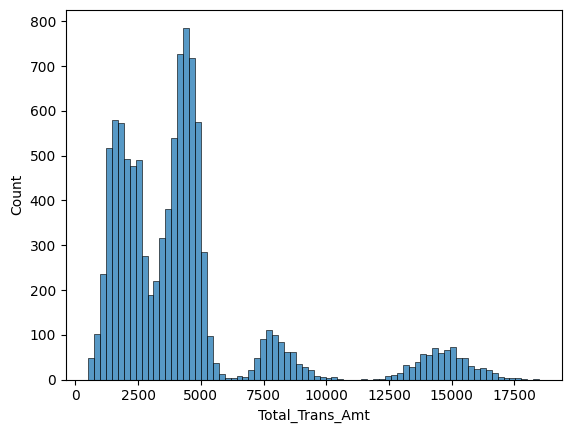

In [ ]:
sns.histplot(data=churn_data,x="Total_Trans_Amt")

- Total transaction amount is right skewed

###What is the distribution of the level of education of customers?

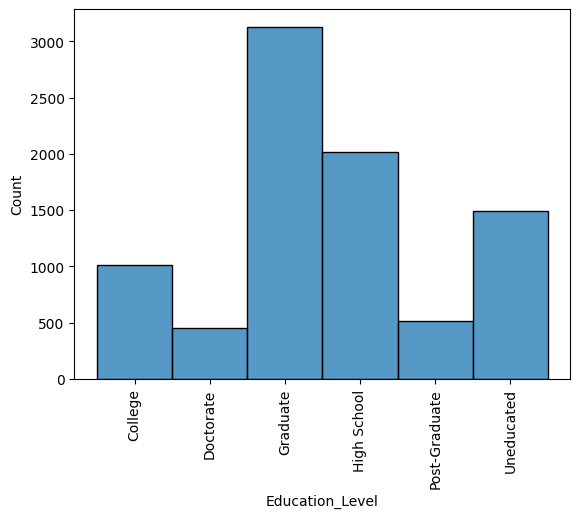

In [ ]:
sns.histplot(data=churn_data,x="Education_Level")
plt.xticks(rotation=90);

- Distribution of education level is normal
- There are more Graduate and high school customers having credit card

###What is the distribution of the level of income of customers?

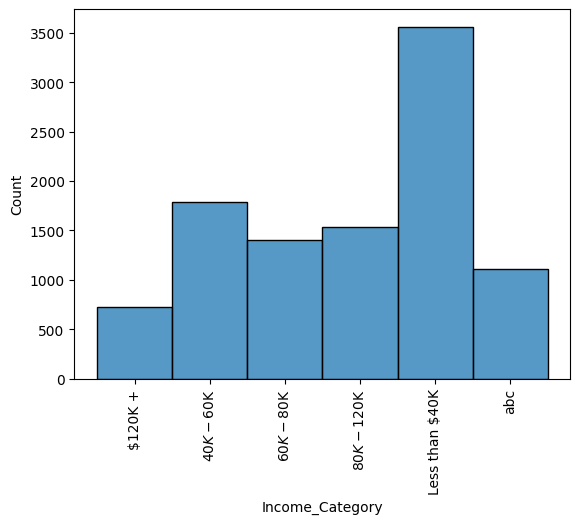

In [ ]:
sns.histplot(data=churn_data,x="Income_Category")
plt.xticks(rotation=90);

- There are more no. of customers around 3000 customers under the income category less than 40K
- Less no. of customers around 700 customers are under the highest income category 120K

###How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?

In [ ]:
churn_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


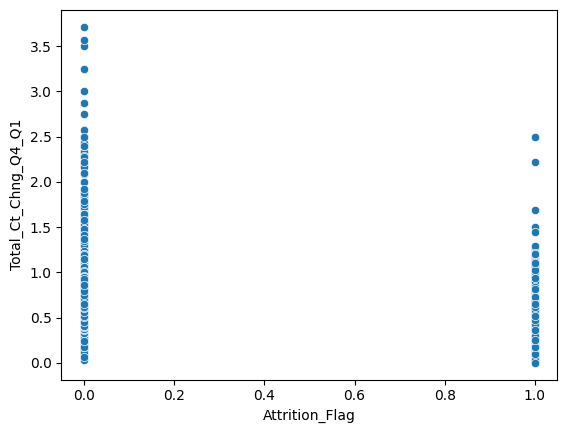

In [ ]:
sns.scatterplot(churn_data,x='Attrition_Flag',y='Total_Ct_Chng_Q4_Q1');

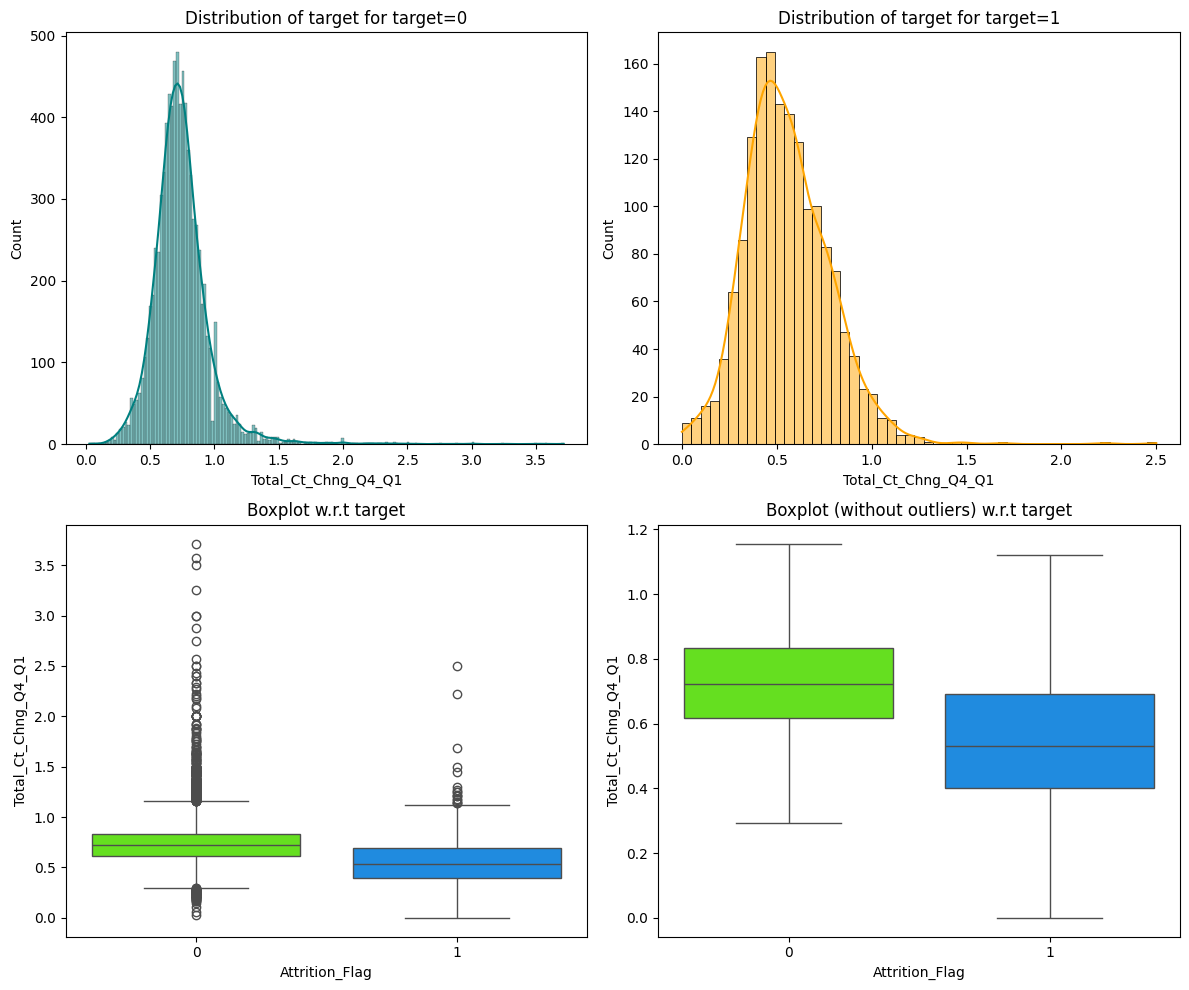

In [ ]:
distribution_plot_wrt_target(churn_data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag");

- Transaction amount is right skewed for both attrition class.
- Customers with attrition class 1 have less no. of Total_Ct_Chng_Q4_Q1.

###How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?

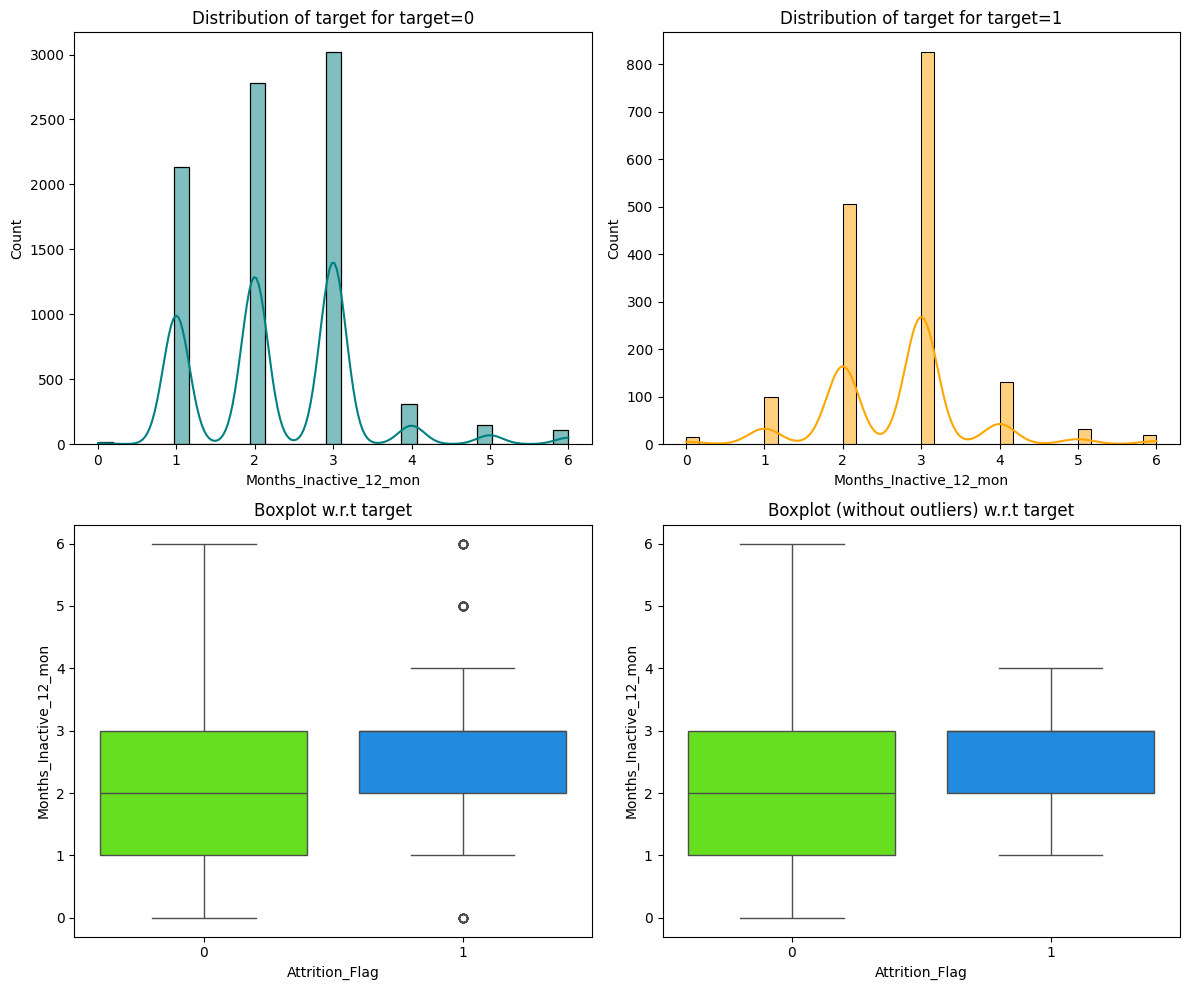

In [ ]:
distribution_plot_wrt_target(churn_data, "Months_Inactive_12_mon", "Attrition_Flag");

- Existing customers had more no. of months inactive in last 12 months

###What are the attributes that have a strong correlation with each other?

In [ ]:
num_cols=[]
for i in churn_data.columns:
  if churn_data[i].dtype!='category':
    num_cols.append(i)



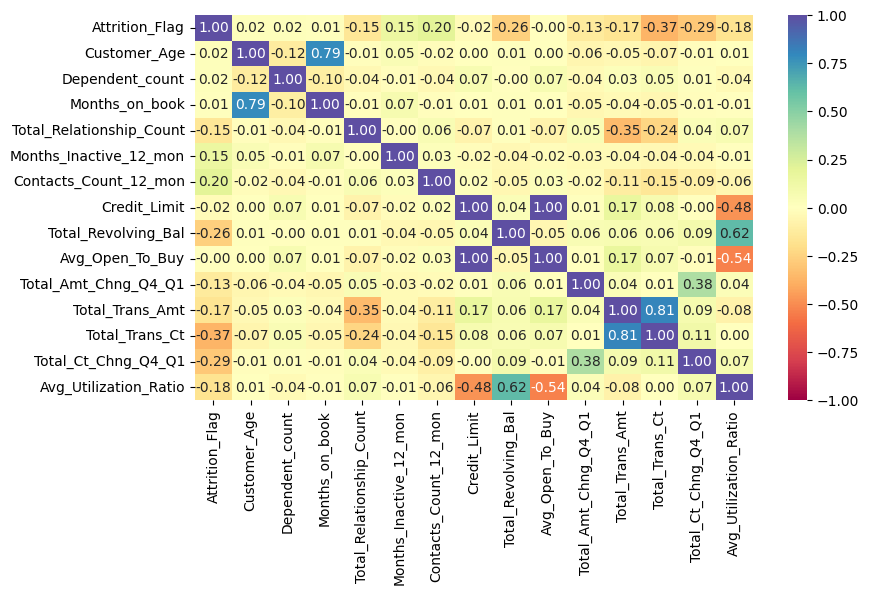

In [ ]:
plt.figure(figsize=(9, 5))
sns.heatmap(churn_data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Avg open to buy and credit limit have higher correlation
- Customer age and month on book have strong correlation with each other
- Total revoloving bal and Avg untiliztion ratio have correlation

## Detailed Exploratory Data Analysis (EDA)

###Bivariate Analysis

####Stacked barplot

Attrition_Flag     0     1    All
Customer_Age                     
All             8500  1627  10127
43               388    85    473
48               387    85    472
44               416    84    500
46               408    82    490
45               407    79    486
49               416    79    495
47               403    76    479
41               303    76    379
50               381    71    452
54               238    69    307
40               297    64    361
42               364    62    426
53               328    59    387
52               318    58    376
51               340    58    398
55               228    51    279
39               285    48    333
38               256    47    303
56               219    43    262
59               117    40    157
37               223    37    260
57               190    33    223
58               133    24    157
36               197    24    221
35               163    21    184
33               107    20    127
34            

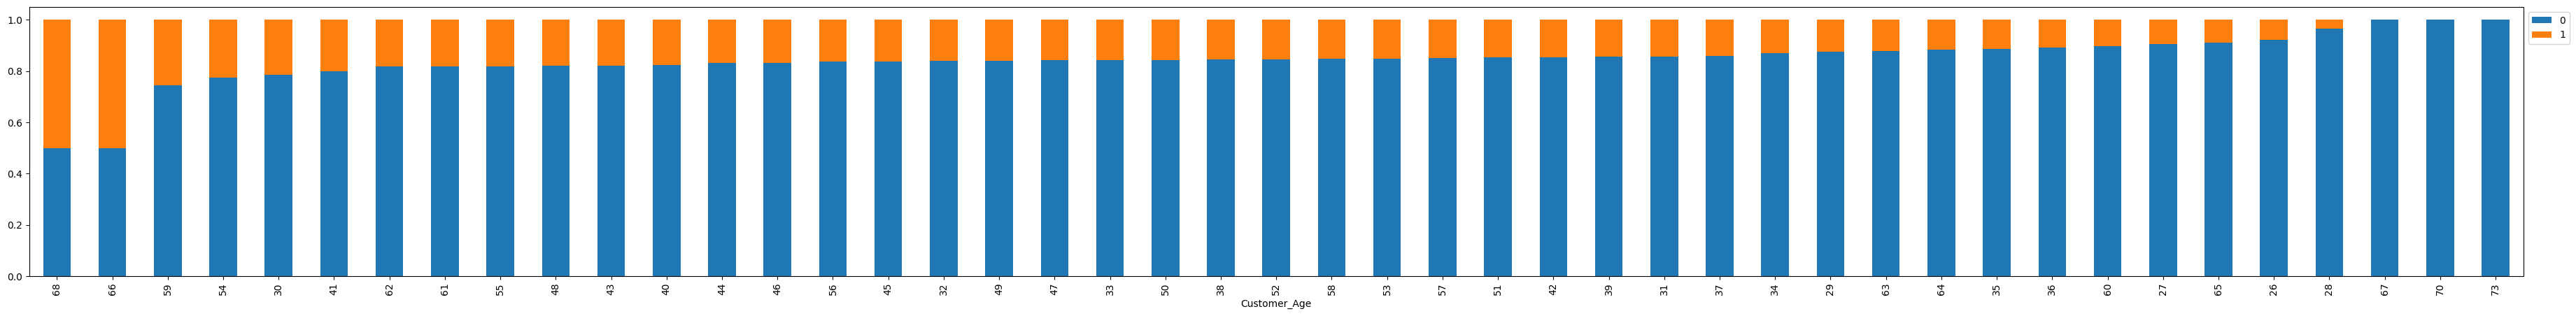

In [ ]:
# Customer_Age vs Target
stacked_barplot(churn_data,'Customer_Age','Attrition_Flag')

- Customers between 60 to 68 years of age shows the highest percentage of attrition
- May be senior citizens tend to close the account

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


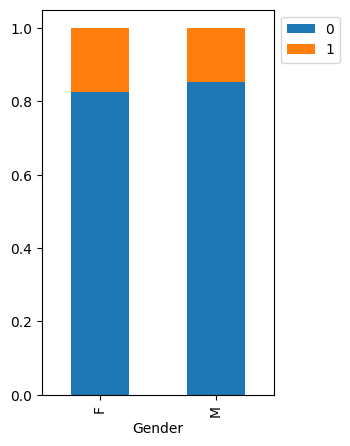

In [ ]:
# Gender vs target
stacked_barplot(churn_data,'Gender','Attrition_Flag')

- Female are more than the male customers
- Female customers has more percentage of attrition

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


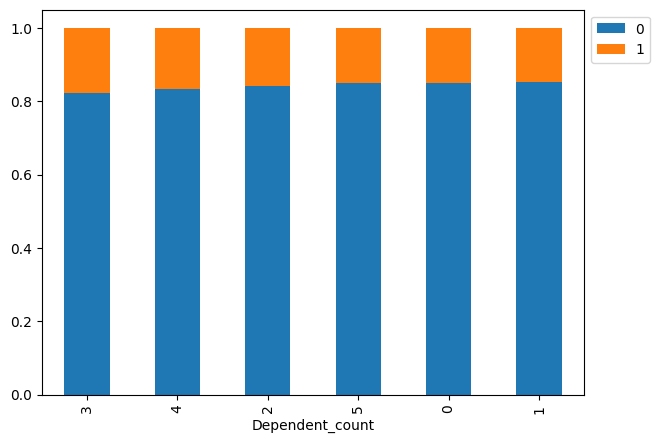

In [ ]:
# Dependent count vs target
stacked_barplot(churn_data,'Dependent_count','Attrition_Flag')

- Attrition rate is alomost same among all the dependnt categories except 3 and 2 have slighly high

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


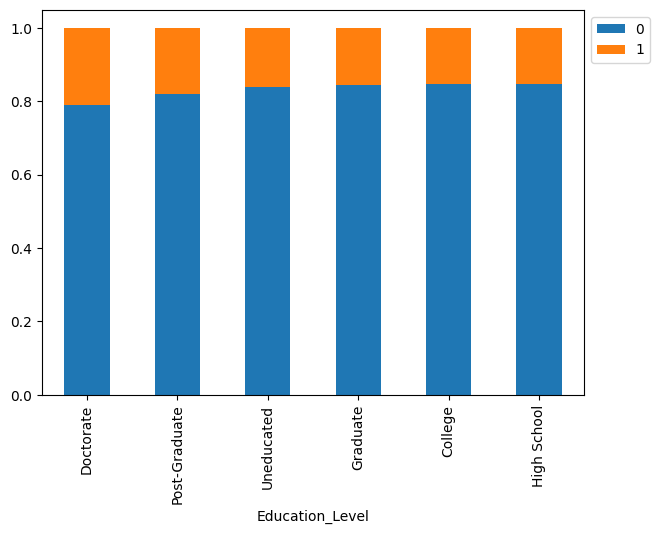

In [ ]:
# Education_Level vs target
stacked_barplot(churn_data,'Education_Level','Attrition_Flag')

- Customers with higher educational level have more percentage of attrition

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


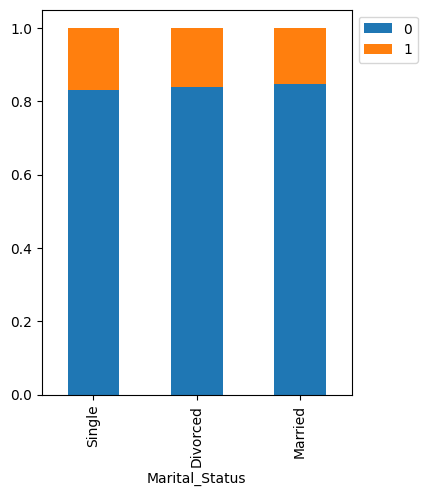

In [ ]:
# Marital_Status vs target
stacked_barplot(churn_data,'Marital_Status','Attrition_Flag')

- Customers who are single have higher percentage of attrition

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


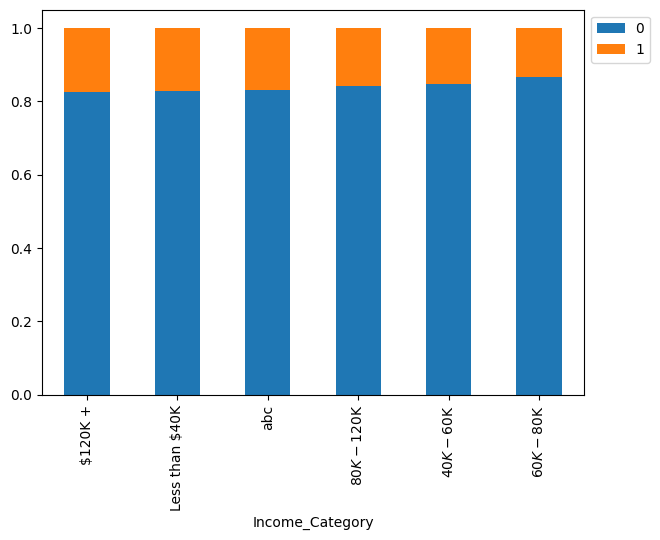

In [ ]:
# Income_Category vs target
stacked_barplot(churn_data,'Income_Category','Attrition_Flag')

- Customers with higher(120k) and lower(<40k) have higher percentage of attrition

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


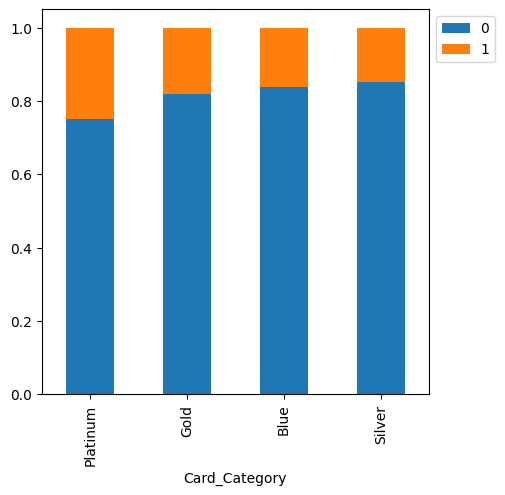

In [ ]:
# Card_Category vs target
stacked_barplot(churn_data,'Card_Category','Attrition_Flag')

- Customers with Platinum and Gold card have higher percentage of attrition

Attrition_Flag     0     1    All
Months_on_book                   
All             8500  1627  10127
36              2033   430   2463
39               277    64    341
37               296    62    358
30               242    58    300
38               290    57    347
34               296    57    353
41               246    51    297
33               257    48    305
40               288    45    333
35               272    45    317
32               245    44    289
28               232    43    275
44               188    42    230
43               231    42    273
46               161    36    197
42               235    36    271
29               207    34    241
31               284    34    318
45               194    33    227
25               134    31    165
24               132    28    160
48               135    27    162
50                71    25     96
49               117    24    141
26               162    24    186
47               147    24    171
27            

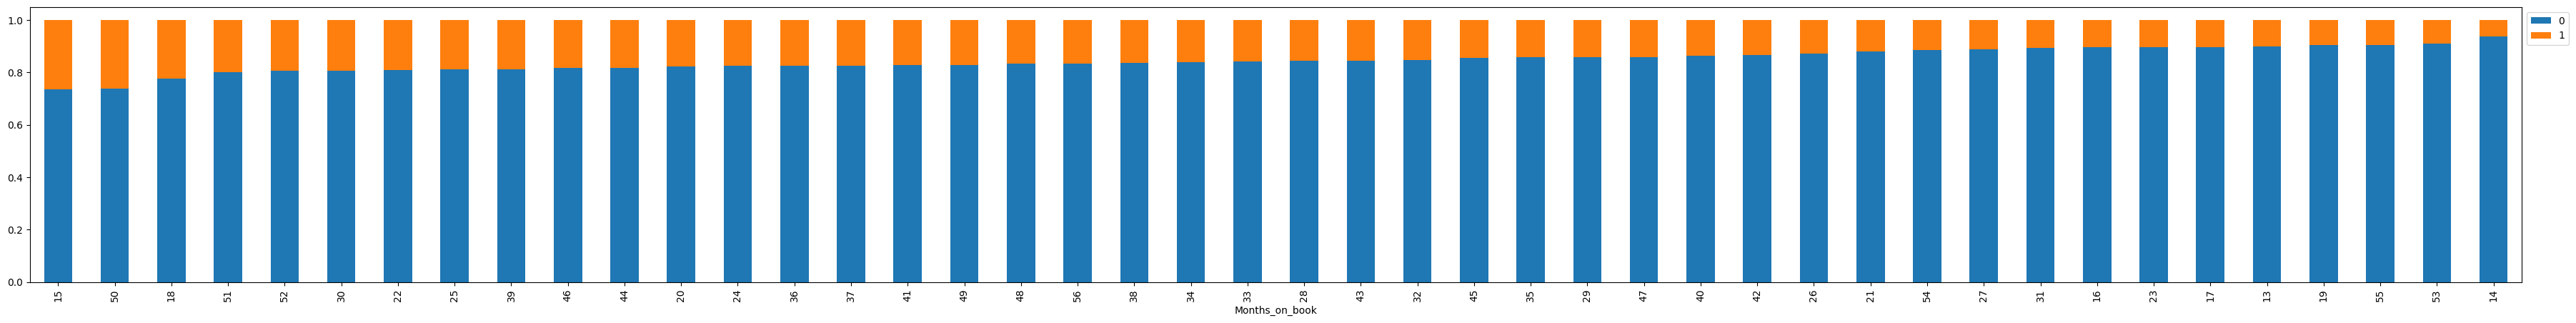

In [ ]:
# Months_on_book vs target
stacked_barplot(churn_data,'Months_on_book','Attrition_Flag')

- Customers who have lower no of months(15) on book and the highest(50) have higher percentage of attrition  

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


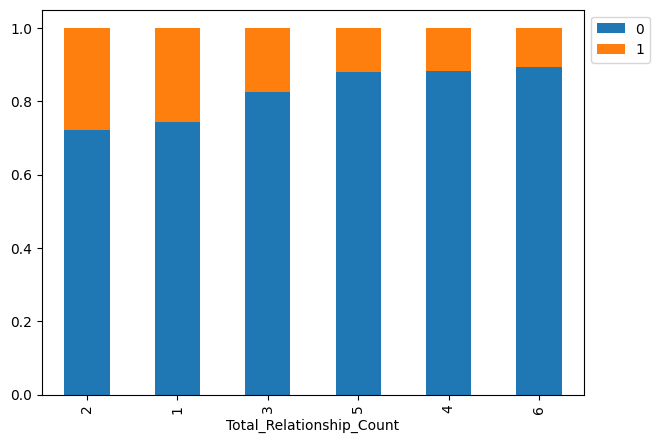

In [ ]:
# Total_Relationship_Count vs target
stacked_barplot(churn_data,'Total_Relationship_Count','Attrition_Flag')

- Customers who have less no of products offered by bank has the higher percentage of attrition

####Distribution of features with respect to target

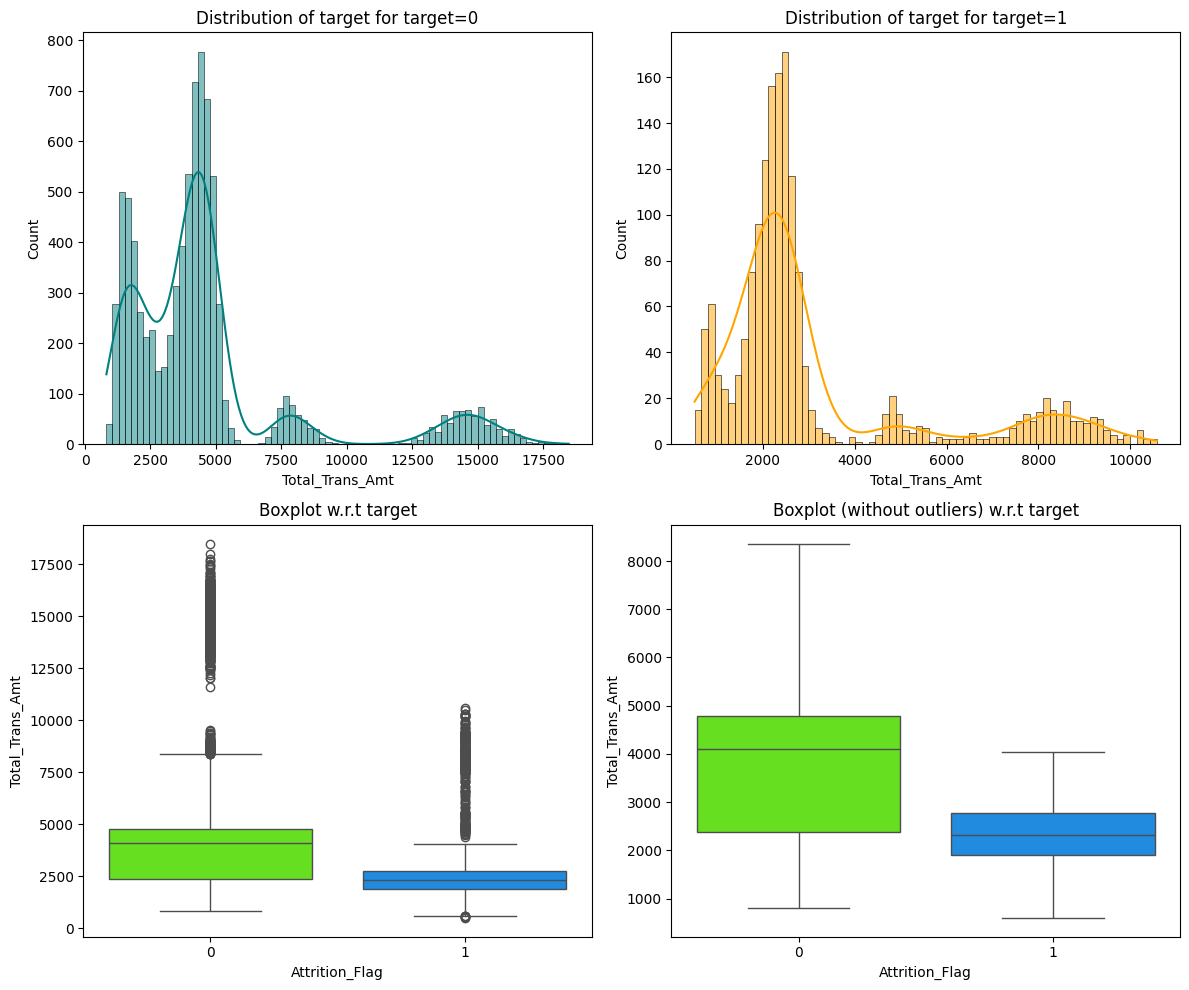

In [ ]:
distribution_plot_wrt_target(churn_data,'Total_Trans_Amt','Attrition_Flag')

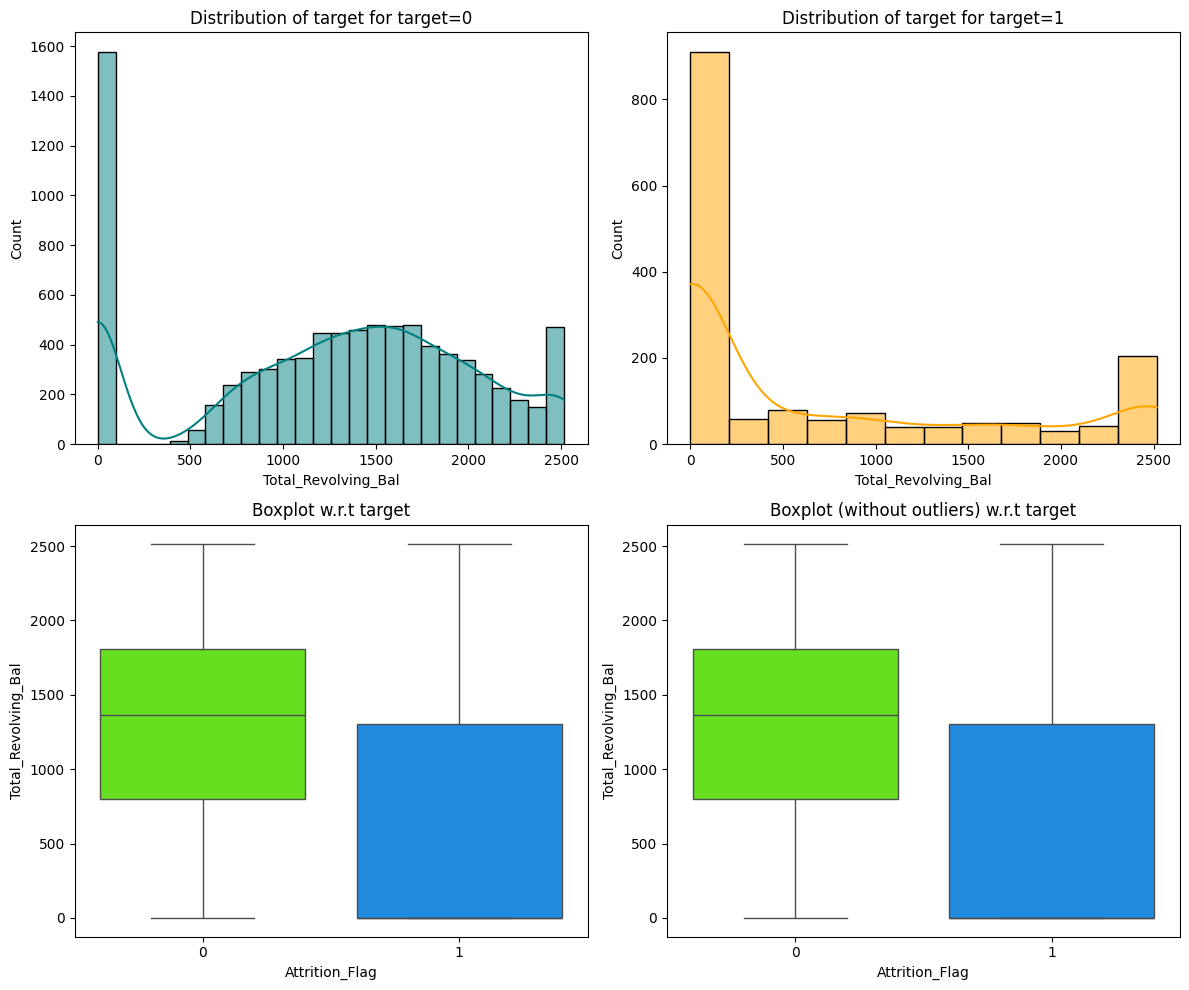

In [ ]:
distribution_plot_wrt_target(churn_data,'Total_Revolving_Bal','Attrition_Flag')

- Customers who attrite have less revolving balance

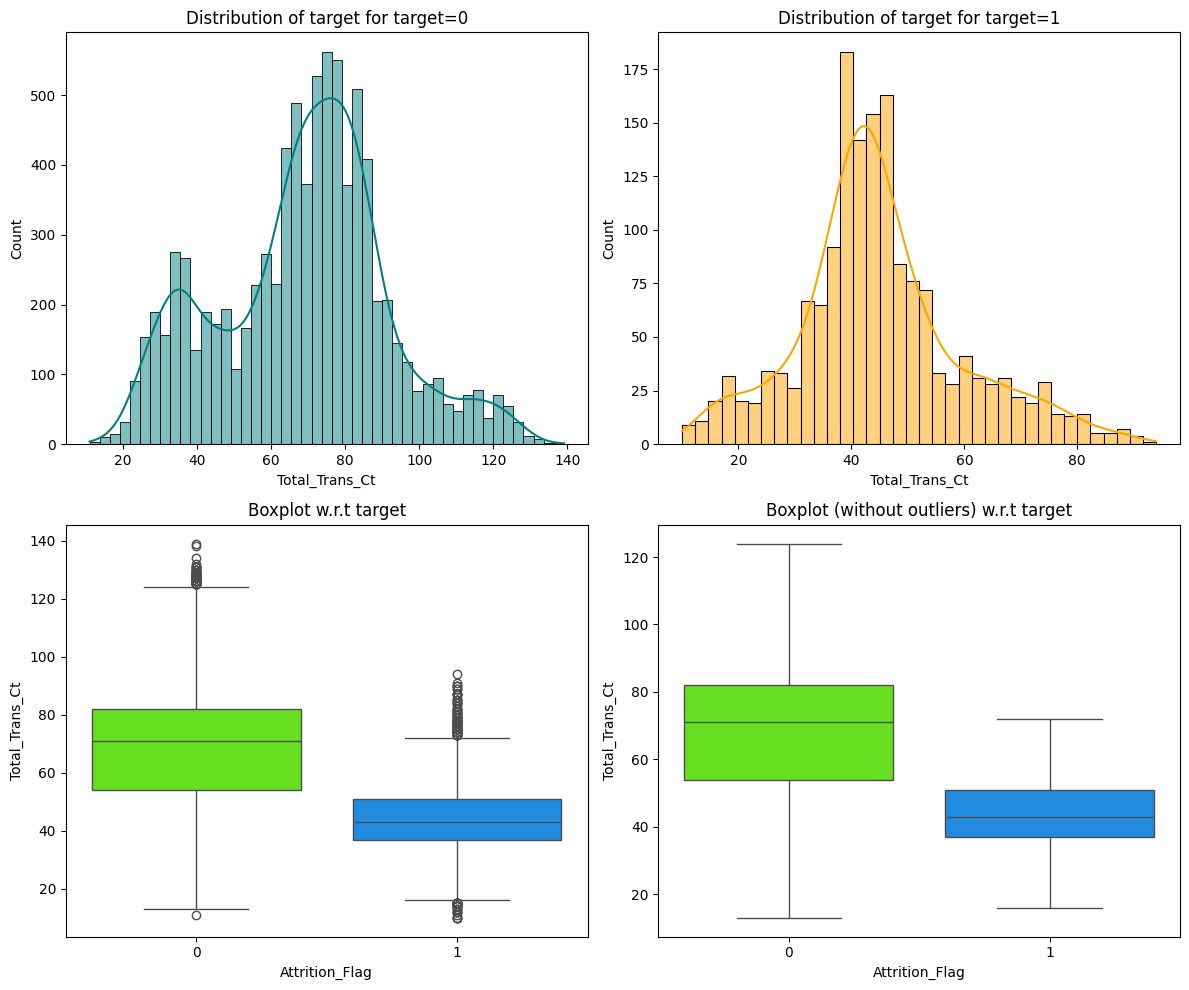

In [ ]:
distribution_plot_wrt_target(churn_data,'Total_Trans_Ct','Attrition_Flag')

- Customers who attrite have less no of transactions

## Data Pre-processing

###Oultier detection

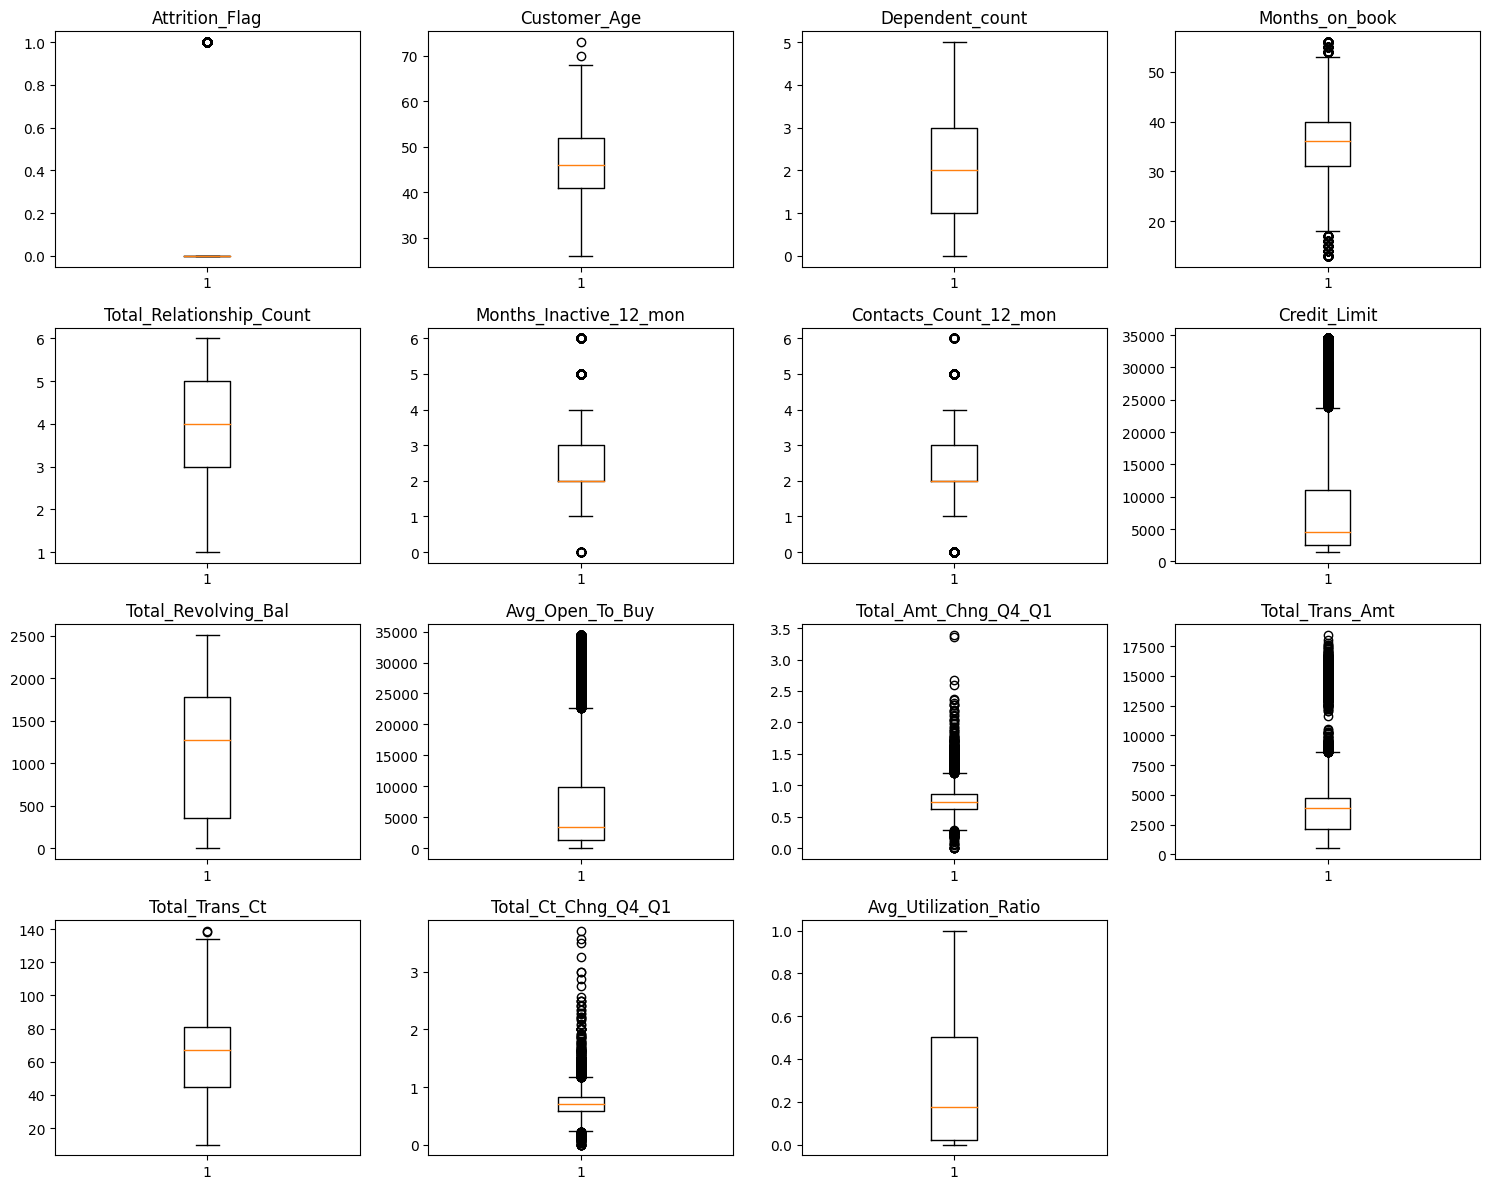

In [ ]:
# outlier detection using boxplot


plt.figure(figsize=(15, 12))

for i, variable in enumerate(churn_data[num_cols]):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(churn_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are few outliers but it is all valid data so no need to treat the outliers

###Checking and treating anomalous data

In [ ]:
for i in churn_data.columns:
  print(i,":")
  print(churn_data[i].unique())

Attrition_Flag :
[0 1]
Customer_Age :
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
Gender :
['M', 'F']
Categories (2, object): ['F', 'M']
Dependent_count :
[3 5 4 2 0 1]
Education_Level :
['High School', 'Graduate', 'Uneducated', NaN, 'College', 'Post-Graduate', 'Doctorate']
Categories (6, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
                         'Uneducated']
Marital_Status :
['Married', 'Single', NaN, 'Divorced']
Categories (3, object): ['Divorced', 'Married', 'Single']
Income_Category :
['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'abc']
Categories (6, object): ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
                         'Less than $40K', 'abc']
Card_Category :
['Blue', 'Gold', 'Silver', 'Platinum']
Categories (4, object): ['Blue', 'Gold', 'Platinum', 'Silver']
Months_on_book :
[39 44 36 34 21 4

- Income category has a anomalous value abc
- Lets replace the anomalous value abc with nan

In [ ]:
#replace abc with nan in Income category
churn_data['Income_Category'].replace("abc",np.nan,inplace=True)
churn_data['Income_Category'].unique()

['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', NaN]
Categories (5, object): ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
                         'Less than $40K']

###Splitting the data(Train-Test split)

In [ ]:
X = churn_data.drop(["Attrition_Flag"], axis=1)
y = churn_data["Attrition_Flag"]

In [ ]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp,X_test,y_temp,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

# then we split the temporary set into train and validation

X_train,X_val,y_train,y_val = train_test_split(X_temp,y_temp,test_size=0.25,random_state=1,stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)



(6075, 19) (2026, 19) (2026, 19)


In [ ]:
print(X_train.shape[0]+ X_val.shape[0]+ X_test.shape[0])

10127


## Missing value imputation




In [ ]:
churn_data.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* We will use mode to impute missing values.

In [ ]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
cols_to_impute = ["Education_Level","Marital_Status","Income_Category"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

In [ ]:
#Checking for any null values after imputing
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

###Encoding categorical variables

In [ ]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


In [ ]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
800,40,2,21,6,4,3,20056.0,1602,18454.0,0.466,...,False,False,True,False,False,False,False,False,False,False
498,44,1,34,6,2,0,2885.0,1895,990.0,0.387,...,False,True,False,False,False,False,True,False,False,False
4356,48,4,36,5,1,2,6798.0,2517,4281.0,0.873,...,False,True,False,False,False,True,False,False,False,False
407,41,2,36,6,2,0,27000.0,0,27000.0,0.610,...,False,True,False,False,True,False,False,False,False,True
8728,46,4,36,2,2,3,15034.0,1356,13678.0,0.754,...,False,False,False,True,False,False,False,False,False,True


## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing a valuable customer or asset.

**How to reduce this loss**

- Bank wants recall to be maximized i.e. we need to reduce the number of false negatives.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
'_______' ## Complete the code to append remaining 3 models in the list models

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.985655737704918
Random forest: 1.0
GBM: 0.875
Adaboost: 0.826844262295082
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Bagging: 0.8128834355828221
Random forest: 0.7975460122699386
GBM: 0.8558282208588958
Adaboost: 0.852760736196319
Xgboost: 0.901840490797546
dtree: 0.8159509202453987


In [ ]:
print("\nTraining and Validation Performance Difference of all the above models:\n")

model1_diff={}

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    model1_diff.update({name:difference1})
    #print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))
print(model1_diff)


Training and Validation Performance Difference of all the above models:

{'Bagging': 0.17277230212209593, 'Random forest': 0.2024539877300614, 'GBM': 0.01917177914110424, 'Adaboost': -0.02591647390123697, 'Xgboost': 0.09815950920245398, 'dtree': 0.18404907975460127}


- GBM has the best performance when compared to other models

### Model Building with Oversampled data


In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)

# Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



In [ ]:
#Model building with oversampled data

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9976465973720338
Random forest: 1.0
GBM: 0.9792116101196313
Adaboost: 0.964698960580506
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Bagging: 0.8619631901840491
Random forest: 0.8619631901840491
GBM: 0.9049079754601227
Adaboost: 0.901840490797546
Xgboost: 0.9294478527607362
dtree: 0.8650306748466258


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

model_over_diff={}

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    model_over_diff.update({name:difference2})

print(model_over_diff)


Training and Validation Performance Difference:

{'Bagging': 0.13568340718798466, 'Random forest': 0.1380368098159509, 'GBM': 0.07430363465950862, 'Adaboost': 0.06285846978295995, 'Xgboost': 0.07055214723926384, 'dtree': 0.13496932515337423}


- GBM and Adaboost performs well when compared to the other models

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9907786885245902
Random forest: 1.0
GBM: 0.9805327868852459
Adaboost: 0.9528688524590164
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Bagging: 0.9294478527607362
Random forest: 0.9386503067484663
GBM: 0.9570552147239264
Adaboost: 0.9601226993865031
Xgboost: 0.9693251533742331
dtree: 0.9202453987730062


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

model_un_diff={}
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    model_un_diff.update({name:difference3})

print(model_un_diff)



Training and Validation Performance Difference:

{'Bagging': 0.06133083576385401, 'Random forest': 0.06134969325153372, 'GBM': 0.023477572161319515, 'Adaboost': -0.007253846927486651, 'Xgboost': 0.030674846625766916, 'dtree': 0.07975460122699385}


- GBM performs well followed by Adboost and Bagging models

- Among all the trained 18 models, Gradient boosting and Adaboost models performs well on both training and validation data.
- The other models were overfitting and underfitting with training and validation set
- Lets tune GBM and Adaboost models with oversampled and undersampled data

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

####Tuning Gradient Boosting with Oversampled data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9541157228347668:
CPU times: user 6.18 s, sys: 739 ms, total: 6.92 s
Wall time: 4min 18s


In [ ]:
tuned_gbm1_over = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm1_over_train = model_performance_classification_sklearn(tuned_gbm1_over, X_train_over, y_train_over)
gbm1_over_train

,Accuracy,Recall,Precision,F1
0,0.975289,0.978623,0.972141,0.975371


In [ ]:
# Checking model's performance on validation set
gbm1_over_val = model_performance_classification_sklearn(tuned_gbm1_over, X_val, y_val)
gbm1_over_val

,Accuracy,Recall,Precision,F1
0,0.960513,0.911043,0.853448,0.881306


####Tuning Gradient Boosting with Undersampled data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 75, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9508267922553637:
CPU times: user 2.18 s, sys: 180 ms, total: 2.36 s
Wall time: 1min 9s


In [ ]:
tuned_gbm2_un = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=75,
    max_features=0.7,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=75, random_state=1,
                           subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm2_un_train = model_performance_classification_sklearn(tuned_gbm2_un, X_train_un, y_train_un)
gbm2_un_train

,Accuracy,Recall,Precision,F1
0,0.970287,0.977459,0.963636,0.970498


In [ ]:
# Checking model's performance on validtion set
gbm2_un_val = model_performance_classification_sklearn(tuned_gbm2_un, X_val, y_val)
gbm2_un_val

,Accuracy,Recall,Precision,F1
0,0.938302,0.957055,0.737589,0.833111


#### Tuning AdaBoostClassifier model with Oversampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9515668956493293:
CPU times: user 6.88 s, sys: 392 ms, total: 7.27 s
Wall time: 3min 16s


In [ ]:
tuned_adb_over = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train_over = model_performance_classification_sklearn(tuned_adb_over, X_train_over, y_train_over)
adb_train_over

,Accuracy,Recall,Precision,F1
0,0.984605,0.984507,0.9847,0.984603


In [ ]:
# Checking model's performance on validation set
adb_val_over = model_performance_classification_sklearn(tuned_adb_over, X_val, y_val)
adb_val_over

,Accuracy,Recall,Precision,F1
0,0.967917,0.907975,0.89426,0.901065


#### Tuning AdaBoostClassifier model with Undersampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9467346938775512:
CPU times: user 1.93 s, sys: 95.7 ms, total: 2.03 s
Wall time: 41.1 s


In [ ]:
tuned_adb_un = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.05,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train_un = model_performance_classification_sklearn(tuned_adb_un, X_train_un, y_train_un)
adb_train_un

,Accuracy,Recall,Precision,F1
0,0.972848,0.978484,0.967579,0.973001


In [ ]:
# Checking model's performance on validation set
adb_val_un = model_performance_classification_sklearn(tuned_adb_un, X_val, y_val)
adb_val_un

,Accuracy,Recall,Precision,F1
0,0.937315,0.966258,0.730858,0.832232


## Model Comparison and Final Model Selection

In [ ]:
# Comparing training perfomance between tuned models

models_train_comp_df = pd.concat([gbm1_over_train.T,gbm2_un_train.T,adb_train_over.T,adb_train_un.T],axis=1)

models_train_comp_df.columns = [
    "Gradient boosting trained with Oversampled data",
    "Gradient boosting trained with Undersampled data",
    "AdaBoost trained with Oversampled data",
    "AdaBoost trained with Undersampled data"]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Oversampled data,Gradient boosting trained with Undersampled data,AdaBoost trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.975289,0.970287,0.984605,0.972848
Recall,0.978623,0.977459,0.984507,0.978484
Precision,0.972141,0.963636,0.984700,0.967579
F1,0.975371,0.970498,0.984603,0.973001


In [ ]:
# Comparing validtion perfomance between tuned models

models_val_comp_df = pd.concat([gbm1_over_val.T,gbm2_un_val.T,adb_val_over.T,adb_val_un.T],axis=1)

models_val_comp_df.columns = [
    "Gradient boosting trained with Oversampled data(VAL)",
    "Gradient boosting trained with Undersampled data(VAL)",
    "AdaBoost trained with Oversampled data(VAL)",
    "AdaBoost trained with Undersampled data(VAL)"]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Gradient boosting trained with Oversampled data(VAL),Gradient boosting trained with Undersampled data(VAL),AdaBoost trained with Oversampled data(VAL),AdaBoost trained with Undersampled data(VAL)
Accuracy,0.960513,0.938302,0.967917,0.937315
Recall,0.911043,0.957055,0.907975,0.966258
Precision,0.853448,0.737589,0.894260,0.730858
F1,0.881306,0.833111,0.901065,0.832232


- AdaBoost model trained with undersampled data generalises well, so we can consider this model as the best model.
- Lets check the performance on the testing data with ADB trained with undersampled data

### Test set final performance

In [ ]:
#Check the performance with test data

ada_test = model_performance_classification_sklearn(tuned_adb_un, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.93386,0.969231,0.71754,0.824607


- The AdaBoost model trained with undersampled data has given 96% recall on the test set
- The AdaBoost model trained with undersampled data on training and validation also gave the recall of 97% and 96%
- Performances are inline with each other, AdaBoost model trained with undersampled data generalises well and we can conclude this as the best model

###Finding most important features

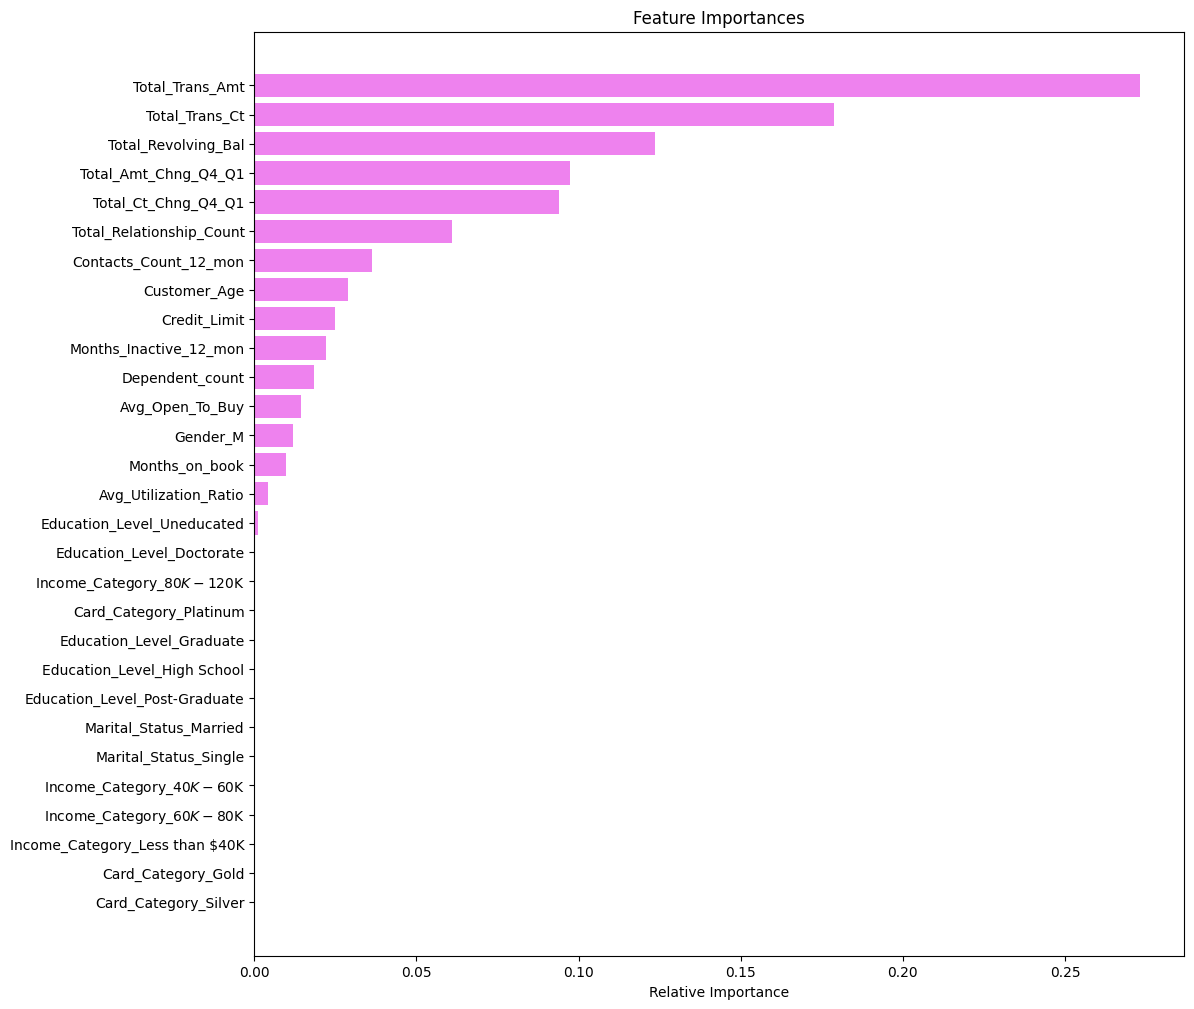

In [ ]:
feature_names = X_train.columns
importances = tuned_adb_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total transaction amount, total transaction count and total revolving balance are the most important features

# Business Insights and Conclusions

***

- Total transaction amount, total transaction count and total revolving balance are the most important features in prediction the attritted customer.
- To increase the transaction amount for customers, bank can reccomend different products from the bank by that way customers will tend to do more transactions.
- Female customers has higher percentage of attrition. Bank can give special offers for women's day and mother's day to retain the female customers.
- Enhance Customer Engagement by increasing the frequency and quality of interactions with customers, especially those showing signs of low engagement.
- Develop specific retention programs based on customer demographics, account activity, and satisfaction levels.
- Regularly review and update the bank's product offerings to ensure they are competitive in the market
